<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/Car_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
df=pd.read_csv('/content/car.data',header=None)
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [110]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


In [111]:
df.columns=['buying','maint','doors','persons','lug_boot','safety','class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [112]:
df.shape

(1728, 7)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [114]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [115]:
!pip install category_encoders

In [116]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
df=encoder.fit_transform(df)
df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [117]:
y=df['class']
x=df.drop(['class'],axis=1)

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [119]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.9682080924855492

In [121]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000) # n_estimator is the number of decision tree
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [122]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9739884393063584

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 76,   2,   0,   1],
       [  1,  14,   0,   2],
       [  2,   0, 238,   0],
       [  1,   0,   0,   9]])

In [124]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

,0
safety,30.643674
persons,25.073270
buying,14.845413
maint,14.468002
lug_boot,9.072492
doors,5.897150


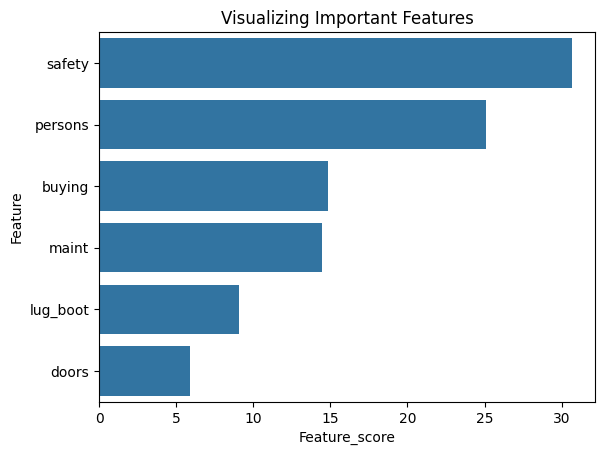

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature_score')
plt.ylabel('Feature')
plt.title('Visualizing Important Features')
plt.show()

In [126]:
df.drop(['doors'],axis=1,inplace=True)

In [146]:
y=df['class']
x=df.drop(['class'],axis=1)

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [148]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [149]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9479768786127167

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 75,   3,   0,   1],
       [  1,  12,   0,   4],
       [  8,   0, 232,   0],
       [  0,   1,   0,   9]])

In [156]:
feature=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)*100

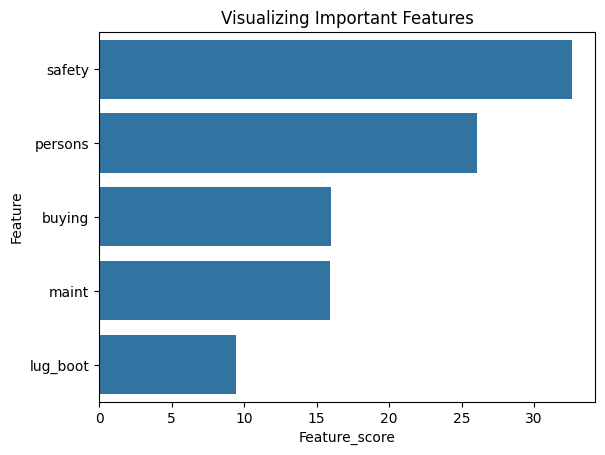

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature,y=feature.index)
plt.xlabel('Feature_score')
plt.ylabel('Feature')
plt.title('Visualizing Important Features')
plt.show()


In [161]:
clf =RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)
print('accuracy : ',format(clf.score(x_test,y_test)*100))

accuracy :  93.64161849710982
